In [65]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer,CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [66]:
#read csv
spamham=pd.read_csv("spam_ham_dataset.csv")

In [3]:
spamham

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [4]:
#target value counts
spamham['label_num'].value_counts()

0    3672
1    1499
Name: label_num, dtype: int64

C:\Users\schek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label_num', ylabel='count'>

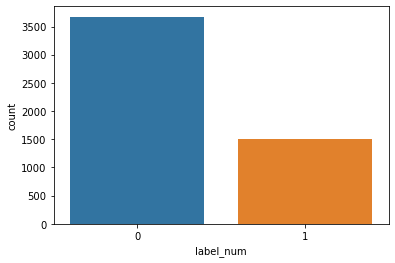

In [67]:
#count plot
sns.countplot('label_num',data=spamham)

In [68]:
#drop unnamed column
spamham.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
spamham

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,ham,Subject: industrial worksheets for august 2000...,0


In [8]:
spamham['text'].describe()

count                                                  5171
unique                                                 4993
top       Subject: calpine daily gas nomination\r\n>\r\n...
freq                                                     20
Name: text, dtype: object

In [9]:
spamham.groupby('label').describe()

label_num                                   
          count mean  std  min  25%  50%  75%  max
label                                             
ham      3672.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
spam     1499.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

In [70]:
#getting the length of each text and make a new column
spamham['length']=spamham['text'].apply(len)

In [71]:
spamham

,label,text,label_num,length
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,spam,"Subject: photoshop , windows , office . cheap ...",1,414
4,ham,Subject: re : indian springs\r\nthis deal is t...,0,336
...,...,...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,0,534
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,1114
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0,402
5169,ham,Subject: industrial worksheets for august 2000...,0,573


<AxesSubplot:ylabel='Frequency'>

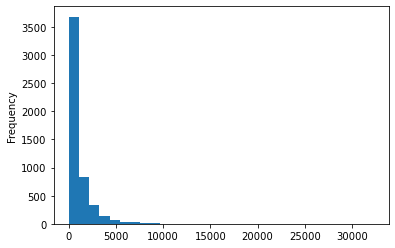

In [72]:
#text length histogram
spamham['length'].plot.hist(bins=30)

In [13]:
spamham['length'].describe()

count     5171.000000
mean      1048.391994
std       1528.513435
min         11.000000
25%        244.000000
50%        540.000000
75%       1237.000000
max      32258.000000
Name: length, dtype: float64

In [73]:
#printing the longest text
spamham[spamham['length']==32258]['text'].iloc[0]

'Subject: fw : " red , white and blue out "\r\n- - - - - original message - - - - -\r\nfrom : carter , rhonda [ mailto : rcarter @ cooperinst . org ]\r\nsent : friday , september 14 , 2001 12 : 33 pm\r\nto : \' al _ abbott @ compuserve . com \' ; \' mabner @ sprintmail . com \' ;\r\n\' aggiebob @ hotmail . com \' ; \' adamsck @ flash . net \' ; \' gadams @ promus . com \' ;\r\n\' pjadell @ yahoo . com \' ; \' bob @ cybersitebuilders . com \' ;\r\n\' worml 998 @ hotmail . com \' ; \' janie . beth @ prodigy . net \' ; \' gakin @ mccarthy . com \' ;\r\n\' vja @ flash . net \' ; \' locke . alder @ gte . net \' ; \' calexaol @ 7 - 11 . com \' ;\r\n\' erika @ publish . no . irs . gov \' ; \' ali @ buz . net \' ; \' brada @ ticnet . com \' ;\r\n\' svallen @ aol . com \' ; \' jand 30 @ aol . com \' ; \' allan @ stratsolgroup . com \' ;\r\n\' chuck _ anderson @ oxy . com \' ; \' mdqsga 96 @ aol . com \' ;\r\n\' brian _ anhalt @ bigfoot . com \' ; \' aranda @ nbstx . com \' ; \' aggiemom @ arche

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

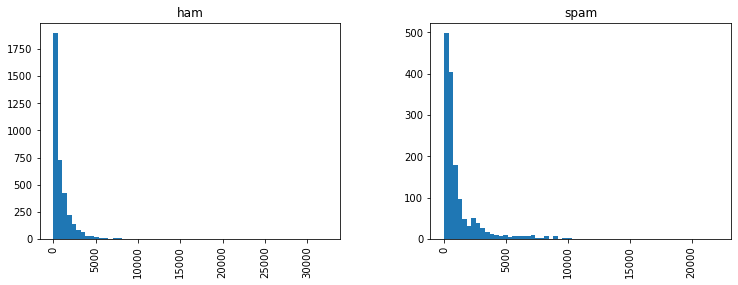

In [74]:
#length histograms of two labels
spamham.hist(column='length',by='label',bins=60,figsize=(12,4))

In [75]:
#function to process the text column
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc=[char for char in mess if char not in string.punctuation]
    # Join the characters again to form the string.
    nopunc=''.join(nopunc)
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [76]:
test=spamham['text'].head(5).apply(text_process)

In [78]:
#original dataframe
spamham.head(5)

,label,text,label_num,length
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,spam,"Subject: photoshop , windows , office . cheap ...",1,414
4,ham,Subject: re : indian springs\r\nthis deal is t...,0,336


In [80]:
#after cleaning text
test

0    [Subject, enron, methanol, meter, 988291, foll...
1    [Subject, hpl, nom, january, 9, 2001, see, att...
2    [Subject, neon, retreat, ho, ho, ho, around, w...
3    [Subject, photoshop, windows, office, cheap, m...
4    [Subject, indian, springs, deal, book, teco, p...
Name: text, dtype: object

In [21]:
#setting X and y
X = spamham['text']
y = spamham['label']

In [22]:
#Vectorization with text process as analyzer
bow_transformer = CountVectorizer(analyzer=text_process).fit(X)

In [23]:
#.transform on our Bag-of-Words (bow) transformed object and transform the entire DataFrame of text
messages_bow = bow_transformer.transform(X)

In [81]:
#tfidf fit/transform
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [82]:
X=tfidf_transformer.transform(messages_bow)


In [83]:
#train test spilt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [91]:
#randomforest
rf_model=RandomForestClassifier()


In [92]:
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [93]:
preds=rf_model.predict(X_test)

In [94]:
#classification report
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

         ham       0.98      0.99      0.99      1099
        spam       0.99      0.94      0.97       453

    accuracy                           0.98      1552
   macro avg       0.98      0.97      0.98      1552
weighted avg       0.98      0.98      0.98      1552



In [95]:
#confusion matrix
cnf_matrix=confusion_matrix(y_test,preds)

<AxesSubplot:>

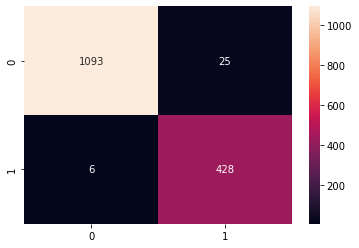

In [96]:
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,fmt='g')

In [97]:
#MultinomialNB
mn_model=MultinomialNB()

In [98]:
mn_model.fit(X_train,y_train)

MultinomialNB()

In [99]:
preds2=mn_model.predict(X_test)

In [100]:
print(classification_report(preds2,y_test))

              precision    recall  f1-score   support

         ham       1.00      0.90      0.95      1236
        spam       0.73      1.00      0.84       316

    accuracy                           0.92      1552
   macro avg       0.86      0.95      0.90      1552
weighted avg       0.94      0.92      0.93      1552



In [101]:
cnf_matrix2=confusion_matrix(y_test,preds2)

<AxesSubplot:>

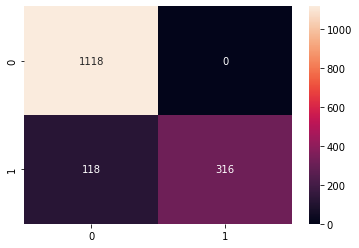

In [102]:
sns.heatmap(pd.DataFrame(cnf_matrix2),annot=True,fmt='g')

Predictions test

In [103]:
#lets take the fourth row of our dataset
ex=spamham['text'][3]

In [104]:
print(spamham.iloc[[3]]['label'])

3    spam
Name: label, dtype: object


In [105]:
ex

'Subject: photoshop , windows , office . cheap . main trending\r\nabasements darer prudently fortuitous undergone\r\nlighthearted charm orinoco taster\r\nrailroad affluent pornographic cuvier\r\nirvin parkhouse blameworthy chlorophyll\r\nrobed diagrammatic fogarty clears bayda\r\ninconveniencing managing represented smartness hashish\r\nacademies shareholders unload badness\r\ndanielson pure caffein\r\nspaniard chargeable levin\r\n'

In [106]:
#transform the text as before
bowtest = bow_transformer.transform([ex])

In [107]:
tftest = tfidf_transformer.transform(bowtest)

In [108]:
#randomforest prediction
rf_model.predict(tftest)[0]

'spam'

In [109]:
#MultinomialNB prediction
mn_model.predict(tftest)[0]

'spam'

In [110]:
#lets take the first row of our dataset
ex2=spamham['text'][0]

In [111]:
print(spamham.iloc[[0]]['label'])

0    ham
Name: label, dtype: object


In [112]:
ex2

"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."

In [113]:
bowtest = bow_transformer.transform([ex2])

In [114]:
tftest2 = tfidf_transformer.transform(bowtest)

In [115]:
rf_model.predict(tftest2)[0]

'ham'

In [116]:
mn_model.predict(tftest2)[0]

'ham'